In [18]:
# ! pip3 install --user pandas
# ! pip3 install --user numpy
# ! pip3 install --user seaborn
# ! pip3 install --user matplotlib==3.1.3
# ! pip3 install --user plotly

Load color analysis results into a single dataset.

In [19]:
import os
from os.path import join
from glob import glob
import csv

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

images = glob('../data_sm/*.JPG')
print("Input images:", len(images))

results = glob('../output_sm/*.csv')
print("Result files:", len(results))

headers = []
rows = []
for result in results:
    with open(result, 'r') as file:
        reader = csv.reader(file)
        if len(headers) == 0: headers = next(reader, None)
        else: next(reader, None)
        for row in reader: rows.append(row)

df = pd.DataFrame(rows, columns=headers)
print(df)

Input images: 9
Result files: 9
                         Image Plant      Hex                    R  \
0    10_14_19.Control.5V4B9759     0  #7e7c31  0.49411764705882355   
1    10_14_19.Control.5V4B9759     0  #d3c988   0.8274509803921568   
2    10_14_19.Control.5V4B9759     0  #a07a4d   0.6274509803921569   
3    10_14_19.Control.5V4B9759     0  #665525                  0.4   
4    10_14_19.Control.5V4B9759     0  #a99f50   0.6627450980392157   
..                         ...   ...      ...                  ...   
465   10_14_19.Calmag.5V4B9763     4  #58472f  0.34509803921568627   
466   10_14_19.Calmag.5V4B9763     5  #414432   0.2549019607843137   
467   10_14_19.Calmag.5V4B9763     5  #42432f  0.25882352941176473   
468   10_14_19.Calmag.5V4B9763     5  #625d40   0.3843137254901961   
469   10_14_19.Calmag.5V4B9763     5  #4a462e   0.2901960784313726   

                       G                    B    Freq  
0    0.48627450980392156  0.19215686274509805  160116  
1      0.788235

Extract treatment from image name.

In [20]:
df['Treatment'] = df.apply(lambda row: 'Control' if 'control' in row['Image'].lower() else ('MaxSea' if 'maxsea' in row['Image'].lower() else ('CalMag' if 'calmag' in row['Image'].lower() else np.NaN)), axis=1)
print(df)

                         Image Plant      Hex                    R  \
0    10_14_19.Control.5V4B9759     0  #7e7c31  0.49411764705882355   
1    10_14_19.Control.5V4B9759     0  #d3c988   0.8274509803921568   
2    10_14_19.Control.5V4B9759     0  #a07a4d   0.6274509803921569   
3    10_14_19.Control.5V4B9759     0  #665525                  0.4   
4    10_14_19.Control.5V4B9759     0  #a99f50   0.6627450980392157   
..                         ...   ...      ...                  ...   
465   10_14_19.Calmag.5V4B9763     4  #58472f  0.34509803921568627   
466   10_14_19.Calmag.5V4B9763     5  #414432   0.2549019607843137   
467   10_14_19.Calmag.5V4B9763     5  #42432f  0.25882352941176473   
468   10_14_19.Calmag.5V4B9763     5  #625d40   0.3843137254901961   
469   10_14_19.Calmag.5V4B9763     5  #4a462e   0.2901960784313726   

                       G                    B    Freq Treatment  
0    0.48627450980392156  0.19215686274509805  160116   Control  
1      0.788235294117647   

Drop rows with unknown treatment (TODO: ask Mason about unlabeled images).

In [21]:
df.dropna(how='any', inplace=True)
print(df)

                         Image Plant      Hex                    R  \
0    10_14_19.Control.5V4B9759     0  #7e7c31  0.49411764705882355   
1    10_14_19.Control.5V4B9759     0  #d3c988   0.8274509803921568   
2    10_14_19.Control.5V4B9759     0  #a07a4d   0.6274509803921569   
3    10_14_19.Control.5V4B9759     0  #665525                  0.4   
4    10_14_19.Control.5V4B9759     0  #a99f50   0.6627450980392157   
..                         ...   ...      ...                  ...   
465   10_14_19.Calmag.5V4B9763     4  #58472f  0.34509803921568627   
466   10_14_19.Calmag.5V4B9763     5  #414432   0.2549019607843137   
467   10_14_19.Calmag.5V4B9763     5  #42432f  0.25882352941176473   
468   10_14_19.Calmag.5V4B9763     5  #625d40   0.3843137254901961   
469   10_14_19.Calmag.5V4B9763     5  #4a462e   0.2901960784313726   

                       G                    B    Freq Treatment  
0    0.48627450980392156  0.19215686274509805  160116   Control  
1      0.788235294117647   

Add columns for HSV color representation.

In [22]:
from colorsys import rgb_to_hsv

def to_hsv(row):
    hsv = rgb_to_hsv(float(row['R']), float(row['G']), float(row['B']))
    return [hsv[0], hsv[1], hsv[2]]

df['H'], df['S'], df['V'] = zip(*df.apply(lambda row: to_hsv(row), axis=1))
print(df)

                         Image Plant      Hex                    R  \
0    10_14_19.Control.5V4B9759     0  #7e7c31  0.49411764705882355   
1    10_14_19.Control.5V4B9759     0  #d3c988   0.8274509803921568   
2    10_14_19.Control.5V4B9759     0  #a07a4d   0.6274509803921569   
3    10_14_19.Control.5V4B9759     0  #665525                  0.4   
4    10_14_19.Control.5V4B9759     0  #a99f50   0.6627450980392157   
..                         ...   ...      ...                  ...   
465   10_14_19.Calmag.5V4B9763     4  #58472f  0.34509803921568627   
466   10_14_19.Calmag.5V4B9763     5  #414432   0.2549019607843137   
467   10_14_19.Calmag.5V4B9763     5  #42432f  0.25882352941176473   
468   10_14_19.Calmag.5V4B9763     5  #625d40   0.3843137254901961   
469   10_14_19.Calmag.5V4B9763     5  #4a462e   0.2901960784313726   

                       G                    B    Freq Treatment         H  \
0    0.48627450980392156  0.19215686274509805  160116   Control  0.162338   
1    

Next, RGB-space k-means clustering for each treatment.

CalMag: 147
{(52, 49, 12): 0.03669724770642202,
 (79, 99, 19): 0.04128440366972477,
 (84, 66, 44): 0.045871559633027525,
 (90, 82, 63): 0.09174311926605505,
 (93, 107, 132): 0.045871559633027525,
 (107, 127, 32): 0.05045871559633028,
 (114, 79, 47): 0.027522935779816515,
 (119, 89, 60): 0.045871559633027525,
 (119, 105, 86): 0.022935779816513763,
 (120, 116, 75): 0.03669724770642202,
 (123, 139, 76): 0.04128440366972477,
 (128, 71, 65): 0.03669724770642202,
 (131, 124, 52): 0.03669724770642202,
 (135, 97, 66): 0.03669724770642202,
 (136, 155, 47): 0.027522935779816515,
 (138, 106, 121): 0.045871559633027525,
 (145, 114, 85): 0.027522935779816515,
 (149, 165, 63): 0.045871559633027525,
 (154, 106, 59): 0.03669724770642202,
 (157, 119, 76): 0.03669724770642202,
 (158, 134, 111): 0.045871559633027525,
 (172, 184, 78): 0.05045871559633028,
 (175, 147, 118): 0.009174311926605505,
 (192, 173, 148): 0.045871559633027525,
 (228, 227, 220): 0.03211009174311927}


/Users/wes/dev/pytcher-plants/venv/lib/python3.8/site-packages/scipy/cluster/vq.py:607: UserWarning:

One of the clusters is empty. Re-run kmeans with a different initialization.



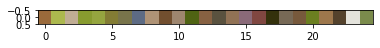

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


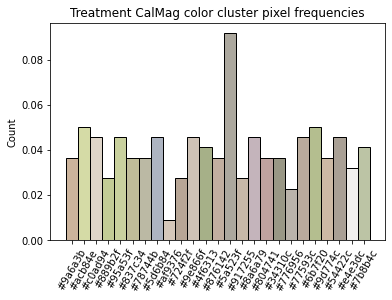

Control: 161
{(43, 37, 5): 0.025510204081632654,
 (54, 38, 40): 0.025510204081632654,
 (71, 60, 17): 0.02040816326530612,
 (74, 88, 22): 0.01020408163265306,
 (81, 74, 51): 0.00510204081632653,
 (83, 92, 75): 0.030612244897959183,
 (98, 84, 164): 0.025510204081632654,
 (98, 115, 34): 0.030612244897959183,
 (113, 101, 61): 0.04591836734693878,
 (115, 77, 39): 0.09183673469387756,
 (119, 127, 41): 0.061224489795918366,
 (133, 148, 57): 0.025510204081632654,
 (148, 77, 52): 0.030612244897959183,
 (149, 108, 64): 0.04081632653061224,
 (151, 124, 78): 0.0663265306122449,
 (152, 156, 56): 0.04591836734693878,
 (162, 158, 74): 0.04591836734693878,
 (163, 169, 69): 0.061224489795918366,
 (171, 112, 74): 0.05102040816326531,
 (176, 139, 97): 0.030612244897959183,
 (181, 173, 76): 0.030612244897959183,
 (186, 175, 97): 0.025510204081632654,
 (195, 163, 124): 0.09183673469387756,
 (207, 189, 111): 0.02040816326530612,
 (209, 185, 141): 0.061224489795918366}


/Users/wes/dev/pytcher-plants/venv/lib/python3.8/site-packages/scipy/cluster/vq.py:607: UserWarning:

One of the clusters is empty. Re-run kmeans with a different initialization.



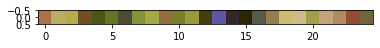

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


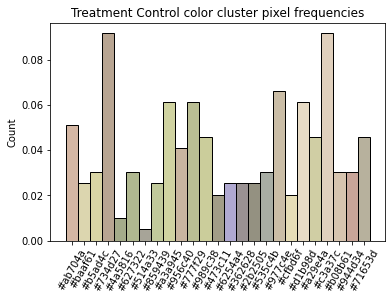

MaxSea: 162
{(48, 53, 9): 0.05343511450381679,
 (66, 123, 8): 0.015267175572519083,
 (75, 91, 22): 0.026717557251908396,
 (86, 73, 50): 0.030534351145038167,
 (101, 121, 35): 0.08015267175572519,
 (112, 79, 41): 0.05725190839694656,
 (116, 93, 66): 0.03816793893129771,
 (123, 36, 33): 0.003816793893129771,
 (124, 146, 54): 0.026717557251908396,
 (124, 149, 42): 0.05343511450381679,
 (131, 150, 66): 0.007633587786259542,
 (138, 100, 58): 0.026717557251908396,
 (139, 121, 39): 0.019083969465648856,
 (145, 113, 71): 0.026717557251908396,
 (146, 148, 35): 0.05725190839694656,
 (150, 167, 62): 0.05343511450381679,
 (152, 117, 81): 0.05343511450381679,
 (157, 173, 83): 0.026717557251908396,
 (163, 130, 92): 0.08015267175572519,
 (170, 123, 67): 0.05725190839694656,
 (177, 189, 91): 0.026717557251908396,
 (184, 152, 104): 0.030534351145038167,
 (186, 183, 117): 0.015267175572519083,
 (198, 177, 138): 0.05343511450381679,
 (201, 207, 138): 0.08015267175572519}


/Users/wes/dev/pytcher-plants/venv/lib/python3.8/site-packages/scipy/cluster/vq.py:607: UserWarning:

One of the clusters is empty. Re-run kmeans with a different initialization.



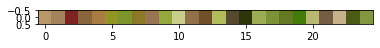

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


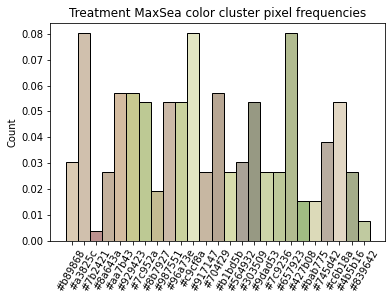

<Figure size 432x288 with 0 Axes>

In [24]:
from pprint import pprint
from collections import Counter

from scipy.cluster.vq import kmeans, kmeans2
import plotly.graph_objects as go

def rgb2hex(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

treatments = list(np.unique(df['Treatment']))
for treatment in treatments:
    # get subset corresponding to this treatment
    subset = df[df['Treatment'] == treatment]
    print(treatment + ":", len(subset))

    colors = dict()
    subset_rgb = subset[['R', 'G', 'B']].astype(float).values.tolist()
    centers, labels = kmeans2(subset_rgb, 25)
    counter = dict(Counter(labels))
    counts = {(int(float(c[0]) * 256), int(float(c[1]) * 256), int(float(c[2]) * 256)): counter[l] for c, l in zip(centers, labels)}
    total = sum(counts.values())
    props = {k: (v / total) for k, v in counts.items()}

    plt.imshow([list(props.keys())])
    plt.show()

    x = list([rgb2hex(k) for k in props.keys()])
    y = list(props.values())
    hp = sns.histplot(x=x, weights=y, hue=x, palette=x, discrete=True)
    plt.xticks(rotation=60)
    plt.legend().remove()
    plt.title(f"Treatment {treatment} color cluster pixel frequencies")
    # plt.savefig(join(output_directory, treatment + '.avg.freq.png'))
    plt.show()
    plt.clf()

    fig = go.Figure()
    r = [k[0] for k in props.keys()]
    g = [k[1] for k in props.keys()]
    b = [k[2] for k in props.keys()]
    colors_map = [f'rgb({c[0]}, {c[1]}, {c[2]})' for c in props.keys()]
    sizes_map = list([v * 1000 for v in props.values()])
    trace=dict(type='scatter3d',
               x=r,
               y=g,
               z=b,
               mode='markers',
               marker=dict(color=colors_map, size=sizes_map))
    fig.add_trace(trace)
    fig.update_layout(title=treatment, scene=dict(
        xaxis_title='G',
        yaxis_title='R',
        zaxis_title='B'))
    fig.show()
    
    # colors = subset.loc[:, ['R', 'G', 'B', 'Freq']].head(100)
    # colors['R'] = colors['R'].astype(float) * 256
    # colors['G'] = colors['G'].astype(float) * 256
    # colors['B'] = colors['B'].astype(float) * 256
    # colors['Freq'] = colors['Freq'].astype(int)
    # print(colors)

    # fig = go.Figure()
    # colors_map = [f'rgb({c[0]}, {c[1]}, {c[2]})' for c in list(colors.apply(
    #     lambda r: (float(r['R']), float(r['G']), float(r['B'])), axis=1))]
    # sizes_map = [(int(f) / 2000) for f in list(colors['Freq'])]
    # trace=dict(type='scatter3d',
    #            x=colors['R'],
    #            y=colors['G'],
    #            z=colors['B'],
    #            mode='markers',
    #            marker=dict(color=colors_map, size=sizes_map))
    # fig.add_trace(trace)
    # fig.update_layout(title=treatment, scene=dict(
    #     xaxis_title='G',
    #     yaxis_title='R',
    #     zaxis_title='B'))
    # fig.show()

TODO: define a series of color slices (bins), compute proportions of each treatment falling into each bin

TODO: compute total pixel counts for each treatment as a proxy for pitcher size
(later try a real pitcher segmentation, but for now just make an overall count)